## Histogram calculation

**cv2.calcHist()** is used to find the histgram. 

**cv2.calcHist(images, channels, mask, histSize, ranges[,hist[,accumulate]])

*images* :gives the source image type. uint or float32. 

*channels* :gives the index of the channel for which we want to calclute histogram. 

*mask* :masks image. to find histogram of full iamge it is given as noen. if want to find histogram of particular region, we have to create a mask image fro that and give it as a mask. 

*histSize* : this represents our BIN count. 

*ranges* this is our range. 

In [4]:
import cv2

img = cv2.imread('../sample_imgs/rasenshuriken.jpeg', 0)
hist = cv2.calcHist([img], [0], None, [256], [0,256])

### histogram calculation in numpy

hist, bins = np.histogram(img.ravel(), 256, [0,256])

thus however calculates 257 bins instead of 256, becuase numpy calcualtes bins as 0-0.99, 1-1.99 etc. 


Also, the opencv variant is about 40X faster than the np.histogram()

## Plotting histograms

there are two ways to plotting histograms:- 
1) short way := using matplotlib
2) Long way := using opencv drawing functions

### Using matplotlib



/var/folders/b8/cky_62q57zxch2nprk7rqs0m0000gn/T/ipykernel_2364/2601336149.py:6: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0,256])


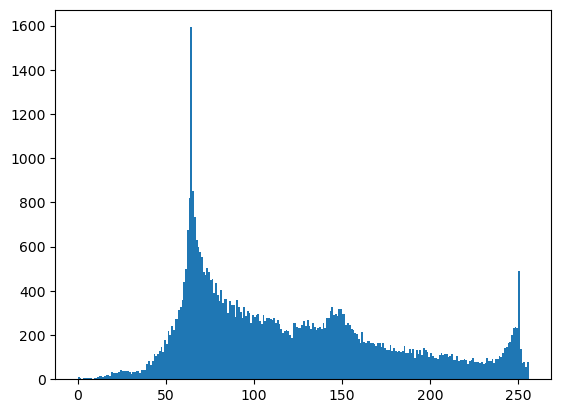

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../sample_imgs/rasenshuriken.jpeg', 0)
plt.hist(img.ravel(), 256, [0,256])
plt.show()


#### normal plot on matplotlib




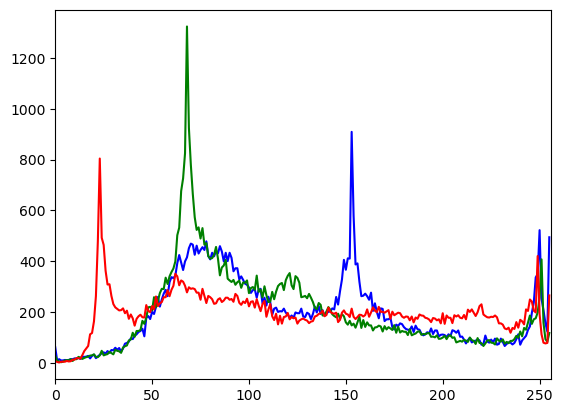

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../sample_imgs/rasenshuriken.jpeg')
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(histr, color = col)
    plt.xlim([0,256])
plt.show()

## Application of mask

we adjust the values of the histograms along with its bin vaoues to lok like x, y coordinteas so that we can draw it using *cv2.line()* or *cv2.polyline()* to generate the above graph. 



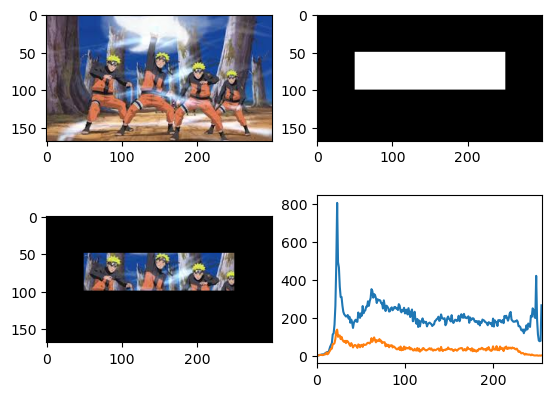

In [13]:
img = cv2.imread('../sample_imgs/rasenshuriken.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[50:100, 50:250] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()